In [17]:
import spacy
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
 
# Download punkt module
nltk.download('punkt')
 
# Initialize spacy 'en' model, keeping only component needed for lemmatization and creating an engine
# https://spacy.io/models
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Import stopwords from nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/vhugobarnes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vhugobarnes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# We create a dataframe for the preprocessed_train.csv
df_train = pd.read_csv('preprocessed_train.csv')

df_train.head()

,index,review_title,review_text
0,3,like funchuck,give dad gag gift direct nunsense get reall kick
1,5,inspire,hope lot people hear cd need strong positive v...
2,5,good soundtrack ever anything,read lot review say good game soundtrack figur...
3,4,chrono cross ost,music yasunori misuda without question close s...
4,5,good true,probably great soundtrack history usually well...


In [8]:
# We create a dataframe for the preprocessed_test.csv
df_test = pd.read_csv('preprocessed_test.csv')
df_test.head()

,index,review_title,review_text
0,1,men ultrasheer,model may ok sedentary type active get around ...
1,4,surprisingly delightful,fast read fill unexpected humour profound insi...
2,2,work advertise,buy one charger instruction say light stay bat...
3,2,oh dear,excited find book ostensibly muslim feminism v...
4,2,incorrect disc,big jvc fan like model suspiscious see several...


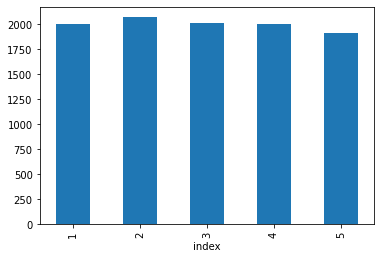

In [14]:
df_train.groupby('index').review_text.count().plot.bar(ylim=0)
plt.show()

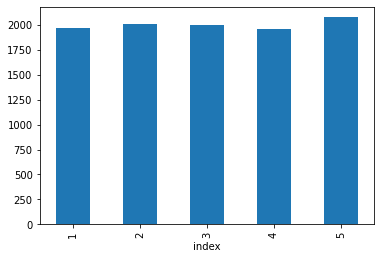

In [15]:
df_test.groupby('index').review_text.count().plot.bar(ylim=0)
plt.show()

In [16]:
# Apply TfidfVectorizer to train dataframe
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df_train['review_text']).toarray()
final_features.shape


(10000, 20427)

In [19]:
# Apply TfidfVectorizer to test dataframe
vectorizer2 = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features2 = vectorizer.fit_transform(df_test['review_text']).toarray()
final_features2.shape

(10000, 20603)

In [20]:
X_train = df_train['review_text']
y_train = df_train['index']

X_test = df_test['review_text']
y_test = df_test['index']

# We use a pipeline to complete the random forest classifier at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi', SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

# Then we fit our model and save it for later
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as file:
  pickle.dump(model, file)

ytest = np.array(y_test)

# Display confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.48      0.46      0.47      1964
           2       0.31      0.32      0.31      2004
           3       0.30      0.30      0.30      1999
           4       0.32      0.32      0.32      1960
           5       0.46      0.47      0.47      2073

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.37     10000
weighted avg       0.37      0.37      0.37     10000

[[894 503 252 167 148]
 [479 633 465 255 172]
 [238 463 601 414 283]
 [121 253 433 628 525]
 [130 194 259 511 979]]
